In [47]:
import pandas as pd
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt
import time
from operator import mul
import scipy.fftpack

In [2]:
df = pd.DataFrame(pd.read_excel("Data.xlsx")) 

In [6]:
df = df.rename(columns={'روز':'day' , 'ساعت':'time'})

In [179]:
factors = (60,1)

In [104]:
df['mins'] = df['time'].apply(lambda x: sum(i*j for i, j in zip(map(int, x.split(':')), factors)))

In [105]:
df['mins'] = df['mins'] + 1440*(df['day'])

In [296]:
df['secs'] = df['mins']*60

In [297]:
df = df.sort_values(by='mins')

In [298]:
df

,day,time,TEDAD,mins,secs
590,0,0:0,38,0,0
589,0,0:1,38,1,60
588,0,0:2,46,2,120
587,0,0:3,29,3,180
586,0,0:4,36,4,240
...,...,...,...,...,...
11574,9,23:55,11,14395,863700
11573,9,23:56,29,14396,863760
11572,9,23:57,30,14397,863820
11571,9,23:58,32,14398,863880


In [299]:
day_0 = df[df['day']==0]

In [300]:
day_0 = df[df['day']==1]

In [301]:
day_0.shape[0]

1375

In [183]:
f = day_0['TEDAD']
ft = np.fft.fft(f)

In [184]:
len(ft)

1375

In [186]:
N = day_0['mins'].max()


2879

In [187]:
t = np.arange(N)

In [206]:
plt. rcParams['figure.figsize'] = [16 , 12]
plt.rcParams.update({'font.size' : 18})

<ipython-input-348-500c881cda71>:7: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color = 'c' , LineWidth = 1.5 , label = 'Noisy')
<ipython-input-348-500c881cda71>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')


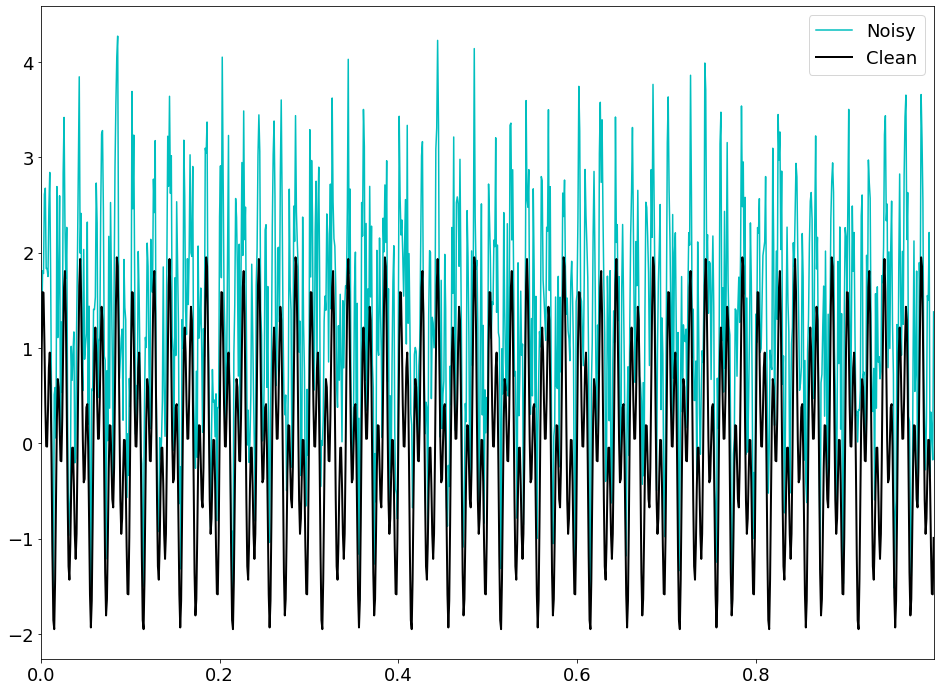

In [348]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t)
f_clean = f
f = f + 2.5*np.random.rand(len(t))

plt.plot(t,f,color = 'c' , LineWidth = 1.5 , label = 'Noisy')
plt.plot(t,f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.xlim(t[0] , t[-1])
plt.legend()

<ipython-input-349-cd1218a159cc>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t , f , color = 'c' , LineWidth = 1.5 , label = 'Noisy')
<ipython-input-349-cd1218a159cc>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t , f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
<ipython-input-349-cd1218a159cc>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L] , PSD[L] , color = 'c', LineWidth = 2 , label = 'Noisy')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


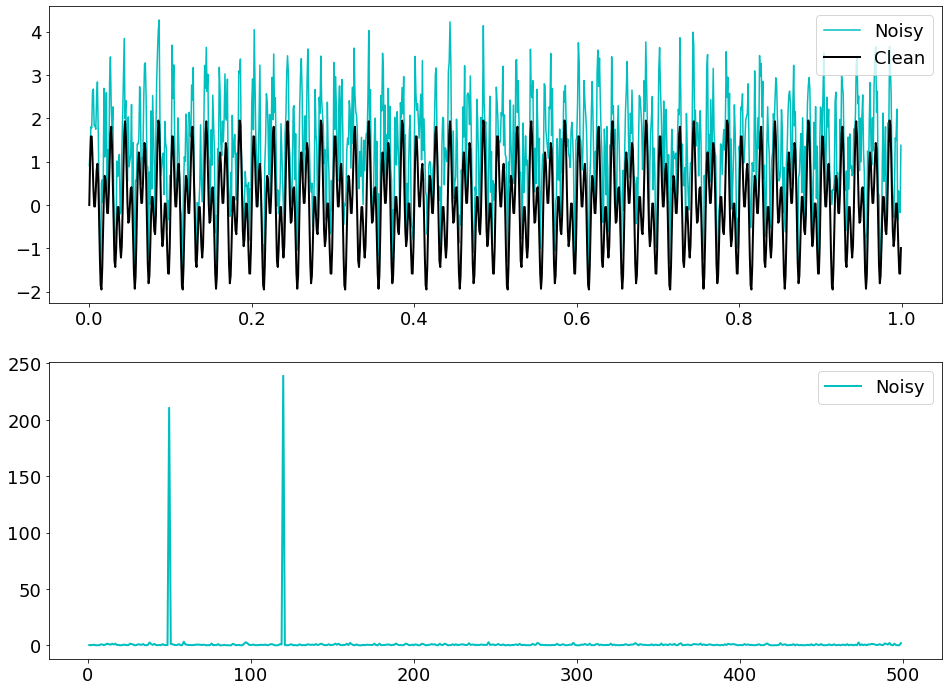

In [349]:
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1 , np.floor(n/2) , dtype = 'int')

fig , axs = plt.subplots(2 , 1)

plt.sca(axs[0])
plt.plot(t , f , color = 'c' , LineWidth = 1.5 , label = 'Noisy')
plt.plot(t , f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L] , PSD[L] , color = 'c', LineWidth = 2 , label = 'Noisy')
plt.legend()

plt.show()

<ipython-input-275-30a60e0a129c>:9: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,f,color = 'c' , LineWidth = 1.5 , label = 'Noisy')


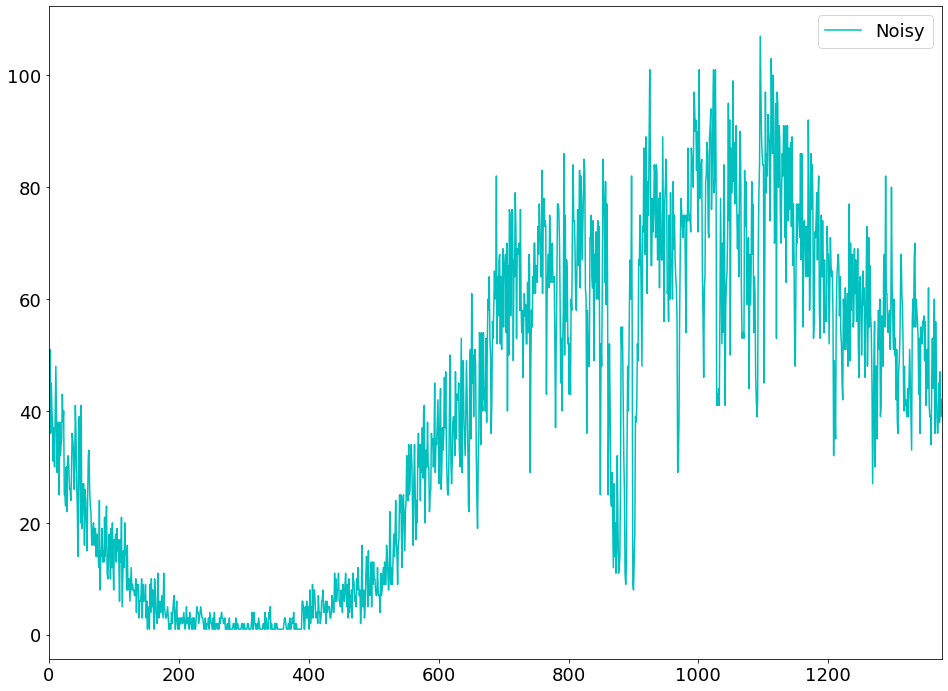

In [275]:
dt = 1
endTime = day_0.shape[0]
t = np.arange(0,endTime,dt)
# t = day_0['mins'].to_numpy(dtype=object)
f = day_0['TEDAD']
# f_clean = f
# f = f + 2.5*np.random.rand(len(t))

plt.plot(t,f,color = 'c' , LineWidth = 1.5 , label = 'Noisy')
# plt.plot(t,f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.xlim(t[0] , t[-1])
plt.legend()

<ipython-input-328-43f05008746b>:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t , f , color = 'c' , LineWidth = 1.5 , label = 'Noisy')
<ipython-input-328-43f05008746b>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L] , PSD[L] , color = 'c', LineWidth = 2 , label = 'Noisy')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


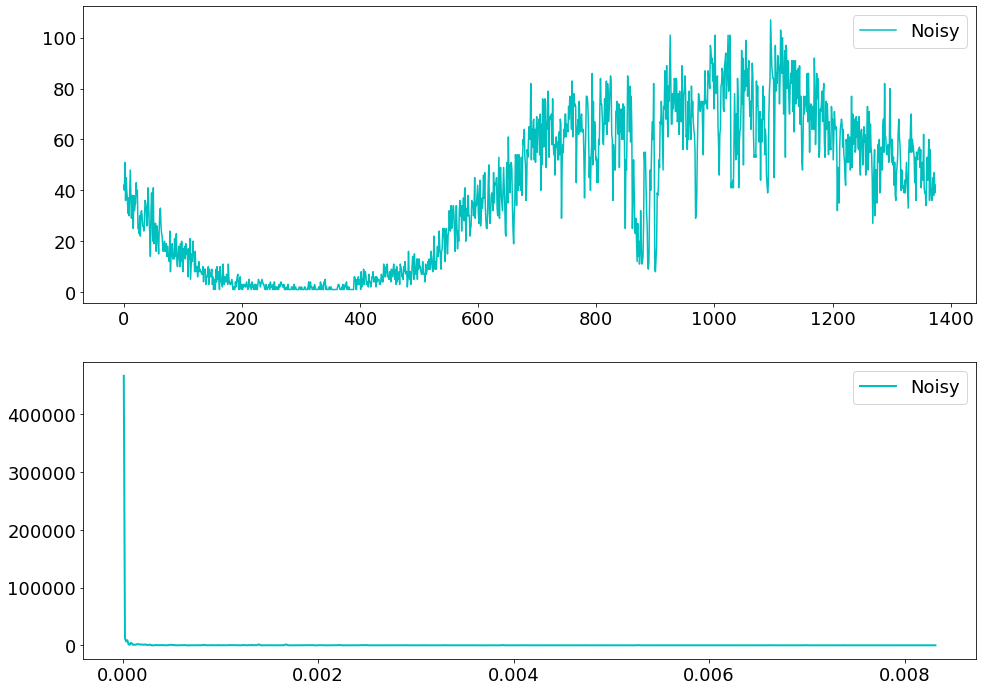

In [328]:
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n*60))*np.arange(n)
L = np.arange(10 ,  , dtype = 'int')

fig , axs = plt.subplots(2 , 1)

plt.sca(axs[0])
plt.plot(t , f , color = 'c' , LineWidth = 1.5 , label = 'Noisy')
# plt.plot(t , f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L] , PSD[L] , color = 'c', LineWidth = 2 , label = 'Noisy')
plt.legend()

plt.show()

<ipython-input-403-7d69cdf3231d>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t_tot,f_tot,color = 'c' , LineWidth = 1.5 , label = 'Noisy')


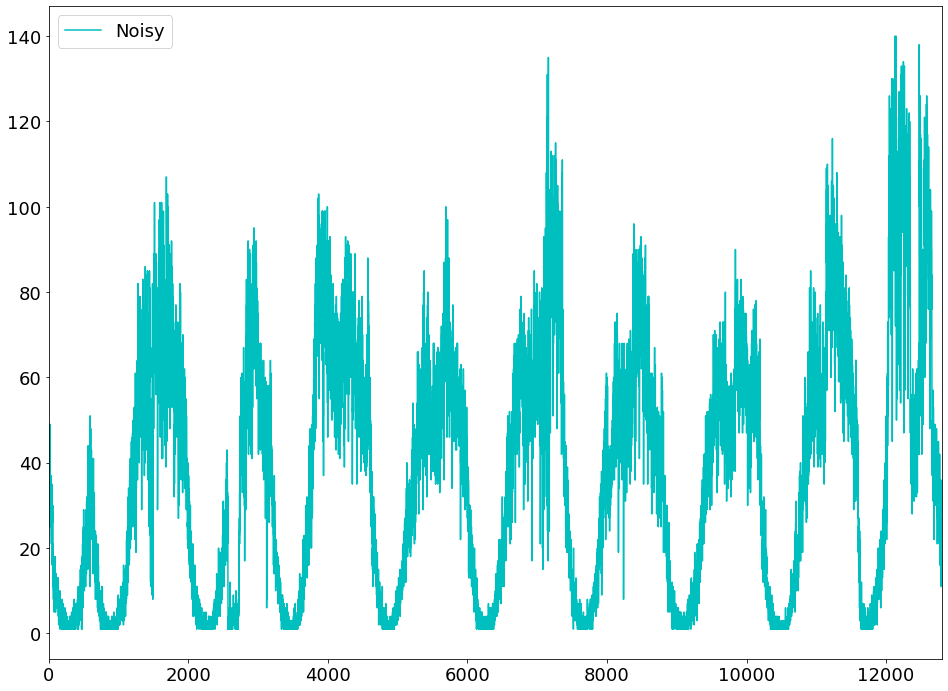

In [403]:
dt = 1
endTime_tot = df.shape[0]
t_tot = np.arange(0,endTime_tot,dt)
f_tot = df['TEDAD']
# f_clean = f
# f = f + 2.5*np.random.rand(len(t))

plt.plot(t_tot,f_tot,color = 'c' , LineWidth = 1.5 , label = 'Noisy')
# plt.plot(t,f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.xlim(t_tot[0] , t_tot[-1])
plt.legend()

<ipython-input-415-6fa922545a76>:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t_tot , f_tot , color = 'c' , LineWidth = 0.5 , label = '')
No handles with labels found to put in legend.
<ipython-input-415-6fa922545a76>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(freq[L_tot] , PSD[L_tot] , color = 'c', LineWidth = 0.8 , label = '')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
No handles with labels found to put in legend.


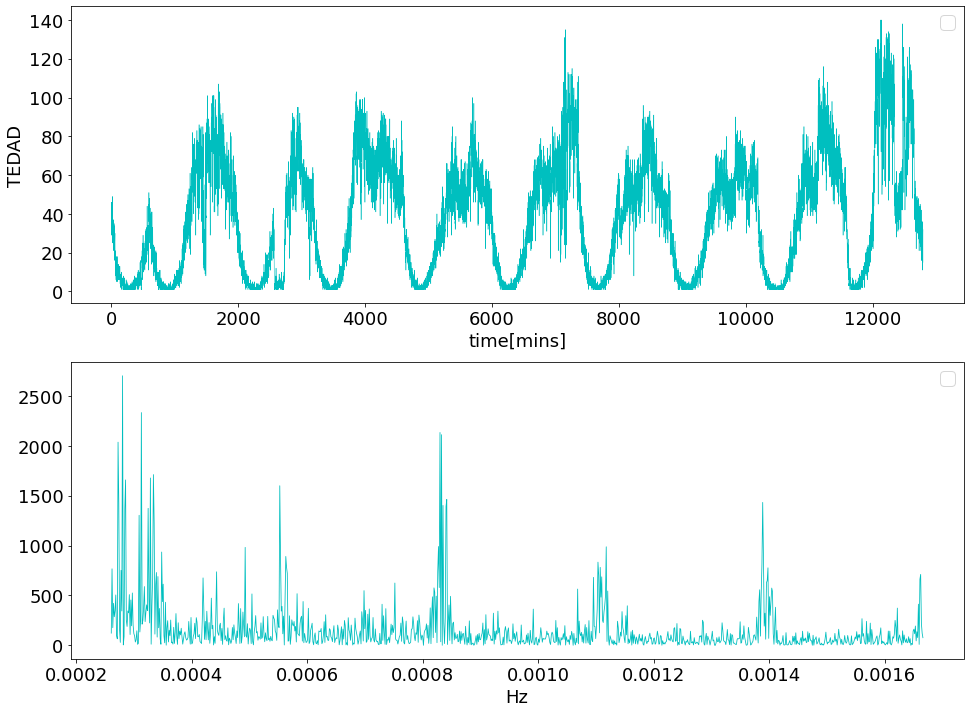

In [415]:
n_tot = len(t_tot)
dt = 1
fhat = np.fft.fft(f_tot,n_tot)
PSD = fhat * np.conj(fhat) / n_tot
freq = (1/(dt*n_tot*60))*np.arange(n_tot)
L_tot = np.arange(200, endTime_tot/10 , dtype = 'int')

fig , axs = plt.subplots(2 , 1)

plt.sca(axs[0])
plt.plot(t_tot , f_tot , color = 'c' , LineWidth = 0.5 , label = '')
# plt.plot(t , f_clean , color = 'k' , LineWidth = 2 , label = 'Clean')
plt.ylabel('TEDAD')
plt.xlabel('time[mins]')

plt.legend()

plt.sca(axs[1])
plt.plot(freq[L_tot] , PSD[L_tot] , color = 'c', LineWidth = 0.8 , label = '')
plt.xlabel('Hz')
# ax.set_xlim(0, 0.1)
# ax.set_ylim(-1, 1)
# plt.xticks(np.arange(0, 12790, 0.05))
plt.legend()


plt.show()

<ipython-input-464-f02bb1362280>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t_tot,f_tot,color = 'c' , LineWidth = 1.5 , label = '')
<ipython-input-464-f02bb1362280>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t_tot,cut_signal_tot ,color = 'r' , LineWidth = 1.5 , label = '')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


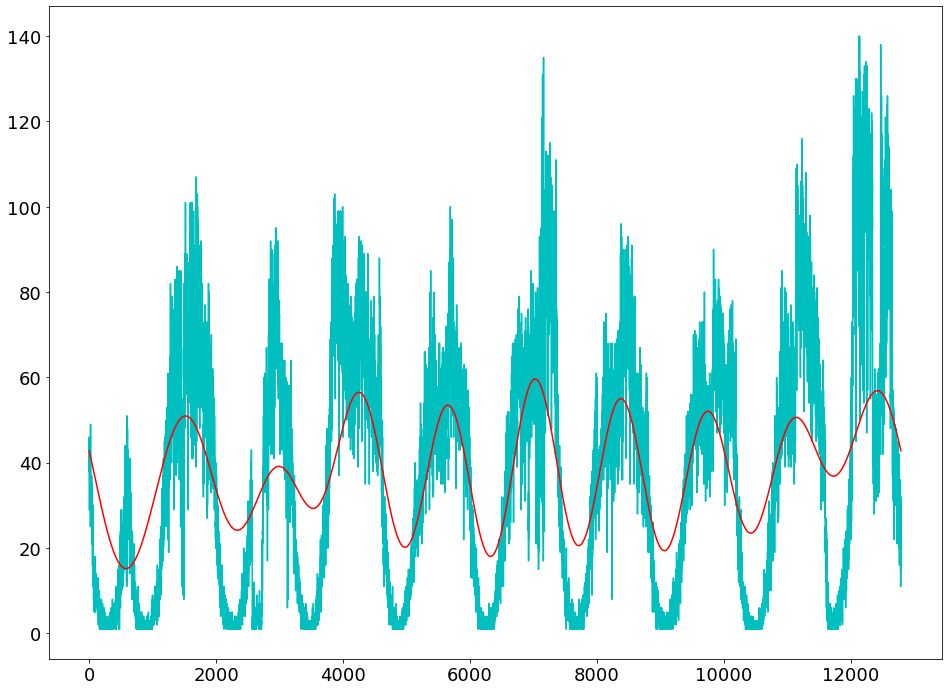

In [464]:
from scipy.fftpack import rfft, irfft, fftfreq, fft

n_tot = len(t_tot)
dt = 1
fhat_tot = np.fft.fft(f_tot,n_tot)
PSD_tot = fhat_tot
# * np.conj(fhat_tot) / n_tot
freq_tot = (1/(dt*n_tot*60))*np.arange(n_tot)
L_tot = np.arange(0, endTime_tot , dtype = 'int')

PSD_tot_cut = PSD_tot.copy()
PSD_tot_cut[L_tot>10] = 0

cut_signal_tot = ifft(PSD_tot_cut)

plt.plot(t_tot,f_tot,color = 'c' , LineWidth = 1.5 , label = '')
plt.plot(t_tot,cut_signal_tot ,color = 'r' , LineWidth = 1.5 , label = '')

# plt.legend()
plt.show()

In [448]:
cut_signal_tot

array([2292.89033922-9.09921227e-13j, 2246.49726434-9.46460252e-13j,
       2234.53220259-3.51172724e-13j, ..., 2230.29287166-8.53051151e-15j,
       2234.53220259+5.59032854e-13j, 2246.49726434+6.18462084e-13j])

In [449]:
f_tot

590      38
589      38
588      46
587      29
586      36
         ..
11574    11
11573    29
11572    30
11571    32
11570    15
Name: TEDAD, Length: 12794, dtype: int64

<ipython-input-444-5813867d7307>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(t,cut_signal ,color = 'r' , LineWidth = 1.5 , label = '')
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


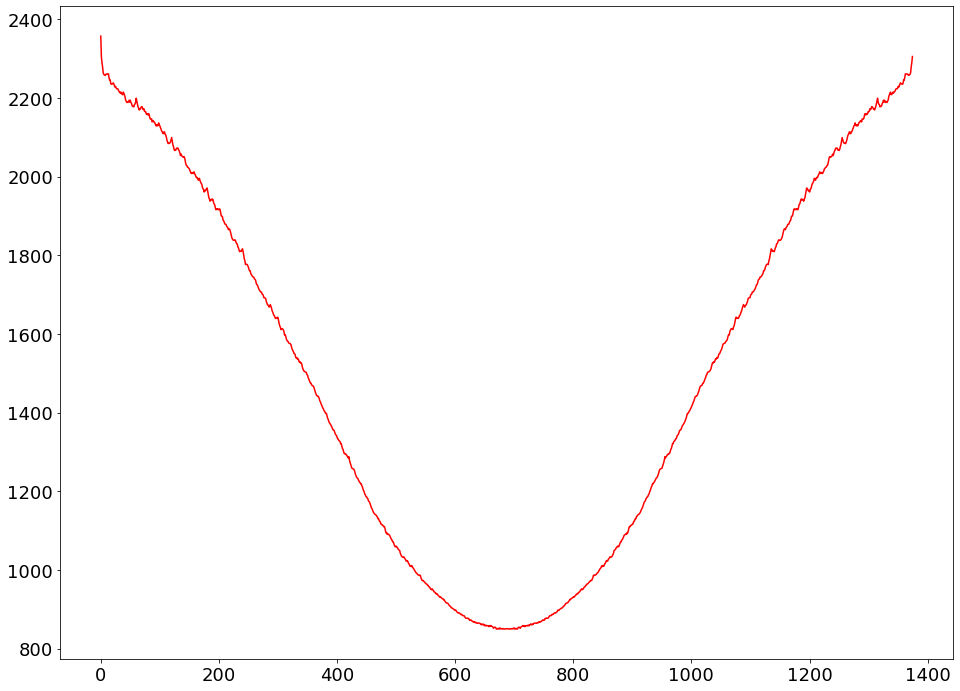

In [444]:
endTime = day_0.shape[0]
t = np.arange(0,endTime,dt)
f = day_0['TEDAD']
n = len(t)
fhat = np.fft.fft(f,n)
PSD = fhat * np.conj(fhat) / n
freq = (1/(dt*n*60))*np.arange(n)
L = np.arange(0, endTime , dtype = 'int')

PSD_cut = PSD.copy()
# PSD_cut[L>100000] = 0

cut_signal = ifft(PSD_cut)

# plt.plot(t_tot,f_tot,color = 'c' , LineWidth = 1.5 , label = '')
plt.plot(t,cut_signal ,color = 'r' , LineWidth = 1.5 , label = '')

# plt.legend()
plt.show()